In [160]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# 新しいCSVファイルを読み込む
new_kanban_data = pd.read_csv("../data/設計値変更後_LTデータ9月.csv", encoding="shift_jis")
# "検収入庫LT"列に"検収入庫LT/設計値_検収入庫LT"の内容を上書き
new_kanban_data['検収入庫LT'] =  new_kanban_data['検収入庫LT/設計値_検収入庫LT'] - 1

In [161]:
# 無効なデータを除外して日付の変換を試みる
new_kanban_data['検収日'] = pd.to_datetime(new_kanban_data['検収日時'], errors='coerce', format='%Y-%m-%d').dt.date

# 指定された時間帯（3時50分から8時まで）のデータをフィルタリング
filtered_daily_data1 = new_kanban_data[(new_kanban_data['検収日時（HHMM）'] >= 350) & (new_kanban_data['検収日時（HHMM）'] <= 800)]
# 各日の「検収日時（HHMM）」ごとのかんばん数と「検収入庫LT」の中央値を計算
grouped_daily_data1 = filtered_daily_data1.groupby('検収日').agg({'かんばんシリアル': 'count', '検収入庫LT': 'median'}).reset_index()

filtered_daily_data2 = new_kanban_data[(new_kanban_data['検収日時（HHMM）'] >= 800) & (new_kanban_data['検収日時（HHMM）'] <= 1230)]
# 各日の「検収日時（HHMM）」ごとのかんばん数と「検収入庫LT」の中央値を計算
grouped_daily_data2 = filtered_daily_data2.groupby('検収日').agg({'かんばんシリアル': 'count', '検収入庫LT': 'median'}).reset_index()

filtered_daily_data3 = new_kanban_data[(new_kanban_data['検収日時（HHMM）'] >= 1230) & (new_kanban_data['検収日時（HHMM）'] <= 1550)]
# 各日の「検収日時（HHMM）」ごとのかんばん数と「検収入庫LT」の中央値を計算
grouped_daily_data3 = filtered_daily_data3.groupby('検収日').agg({'かんばんシリアル': 'count', '検収入庫LT': 'median'}).reset_index()

filtered_daily_data4 = new_kanban_data[(new_kanban_data['検収日時（HHMM）'] >= 1550) & (new_kanban_data['検収日時（HHMM）'] <= 2000)]
# 各日の「検収日時（HHMM）」ごとのかんばん数と「検収入庫LT」の中央値を計算
grouped_daily_data4 = filtered_daily_data4.groupby('検収日').agg({'かんばんシリアル': 'count', '検収入庫LT': 'median'}).reset_index()

filtered_daily_data5 = new_kanban_data[(new_kanban_data['検収日時（HHMM）'] >= 2000) & (new_kanban_data['検収日時（HHMM）'] <= 2359) | (new_kanban_data['検収日時（HHMM）'] >= 0) & (new_kanban_data['検収日時（HHMM）'] <= 30)]
# 各日の「検収日時（HHMM）」ごとのかんばん数と「検収入庫LT」の中央値を計算
grouped_daily_data5 = filtered_daily_data5.groupby('検収日').agg({'かんばんシリアル': 'count', '検収入庫LT': 'median'}).reset_index()

filtered_daily_data6 = new_kanban_data[(new_kanban_data['検収日時（HHMM）'] >= 30) & (new_kanban_data['検収日時（HHMM）'] <= 350)]
# 各日の「検収日時（HHMM）」ごとのかんばん数と「検収入庫LT」の中央値を計算
grouped_daily_data6 = filtered_daily_data6.groupby('検収日').agg({'かんばんシリアル': 'count', '検収入庫LT': 'median'}).reset_index()


grouped_daily_data4.head(30)


,検収日,かんばんシリアル,検収入庫LT
0,2023-09-01,208,4.041667e-01
1,2023-09-04,263,3.500000e-01
2,2023-09-05,156,8.571429e-01
3,2023-09-06,125,8.514493e-02
4,2023-09-07,166,8.333333e-02
5,2023-09-08,161,1.000000e-01
6,2023-09-11,169,6.666667e-02
7,2023-09-12,173,-1.785714e-01
8,2023-09-13,146,3.913043e-01
9,2023-09-14,110,8.220721e-02


In [162]:
# 9月2日のデータを除外して再フィルタリング
# 9月2日、9日、16日のデータを除外
#grouped_daily_data_excluded1 = grouped_daily_data1[
    #~grouped_daily_data1['検収日'].isin([pd.to_datetime('2023-09-02').date(),pd.to_datetime('2023-09-09').date(),pd.to_datetime('2023-09-16').date(),pd.to_datetime('2023-09-23').date()])]
grouped_daily_data_excluded1 = grouped_daily_data1[
    ~grouped_daily_data1['検収日'].isin([pd.to_datetime('2023-09-02').date(),pd.to_datetime('2023-09-04').date(),pd.to_datetime('2023-09-09').date(),pd.to_datetime('2023-09-16').date(),pd.to_datetime('2023-09-23').date()])]

grouped_daily_data_excluded2 = grouped_daily_data2[
    ~grouped_daily_data2['検収日'].isin([pd.to_datetime('2023-09-02').date(),pd.to_datetime('2023-09-09').date(),pd.to_datetime('2023-09-16').date(),pd.to_datetime('2023-09-23').date()])]

grouped_daily_data_excluded3 = grouped_daily_data3[
    ~grouped_daily_data3['検収日'].isin([pd.to_datetime('2023-09-02').date(),pd.to_datetime('2023-09-09').date(),pd.to_datetime('2023-09-16').date(),pd.to_datetime('2023-09-23').date()])]

grouped_daily_data_excluded4 = grouped_daily_data4[
    ~grouped_daily_data4['検収日'].isin([pd.to_datetime('2023-09-02').date(),pd.to_datetime('2023-09-09').date(),pd.to_datetime('2023-09-16').date(),pd.to_datetime('2023-09-23').date()])]

grouped_daily_data_excluded5 = grouped_daily_data5[
    ~grouped_daily_data5['検収日'].isin([pd.to_datetime('2023-09-02').date(),pd.to_datetime('2023-09-09').date(),pd.to_datetime('2023-09-16').date(),pd.to_datetime('2023-09-23').date()])]

grouped_daily_data_excluded6 = grouped_daily_data6[
    ~grouped_daily_data6['検収日'].isin([pd.to_datetime('2023-09-02').date(),pd.to_datetime('2023-09-09').date(),pd.to_datetime('2023-09-16').date(),pd.to_datetime('2023-09-23').date()])]

grouped_daily_data_excluded1


,検収日,かんばんシリアル,検収入庫LT
0,2023-09-01,334,0.434783
3,2023-09-05,578,-0.472222
4,2023-09-06,693,-0.250000
5,2023-09-07,596,-0.250000
6,2023-09-08,702,-0.391304
8,2023-09-11,131,2.181818
9,2023-09-12,114,1.527778
10,2023-09-13,109,-0.619048
11,2023-09-14,327,-0.521739
12,2023-09-15,346,-0.500000


1 0.00030804920987125283
2 130.426855433817
(0.2004442310528779, 0.07652523897160983)
SpearmanrResult(correlation=0.3797867420849347, pvalue=0.0005562009995502732)


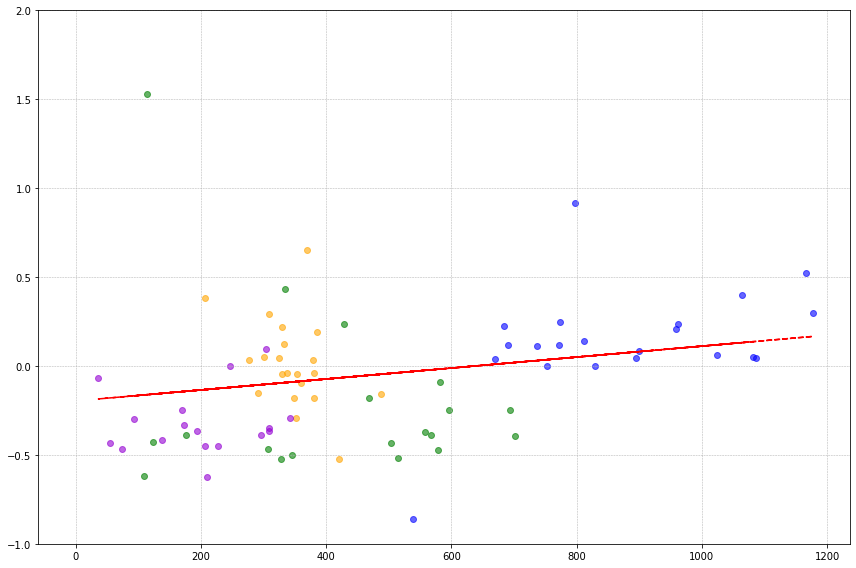

In [165]:
import matplotlib.pyplot as plt

# 各日の「検収入庫LT」と「かんばん数」の散布図を作成
plt.figure(figsize=(12, 8))
plt.scatter(grouped_daily_data_excluded1['かんばんシリアル'], grouped_daily_data_excluded1['検収入庫LT'], alpha=0.6,color="Green")
plt.scatter(grouped_daily_data_excluded2['かんばんシリアル'], grouped_daily_data_excluded2['検収入庫LT'], alpha=0.6,color="Blue")
#plt.scatter(grouped_daily_data_excluded3['かんばんシリアル'], grouped_daily_data_excluded3['検収入庫LT'], alpha=0.6,color="Red")
#plt.scatter(grouped_daily_data_excluded4['かんばんシリアル'], grouped_daily_data_excluded4['検収入庫LT'], alpha=0.6,color="Cyan")
plt.scatter(grouped_daily_data_excluded5['かんばんシリアル'], grouped_daily_data_excluded5['検収入庫LT'], alpha=0.6,color="Orange")
plt.scatter(grouped_daily_data_excluded6['かんばんシリアル'], grouped_daily_data_excluded6['検収入庫LT'], alpha=0.6,color="darkviolet")
#plt.title('各日の指定時間帯の「検収入庫LT」と「かんばん数」の散布図')
#plt.xlabel('かんばん数')
plt.ylim([-1,2])
#plt.ylabel('検収入庫LTの中央値')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# grouped_daily_data_excludedを自身と結合
#concatenated_data = pd.concat([grouped_daily_data_excluded1, grouped_daily_data_excluded2,grouped_daily_data_excluded3, grouped_daily_data_excluded4,grouped_daily_data_excluded5, grouped_daily_data_excluded6], ignore_index=True)
concatenated_data = pd.concat([grouped_daily_data_excluded1, grouped_daily_data_excluded2,grouped_daily_data_excluded5, grouped_daily_data_excluded6], ignore_index=True)

# NaNを除外
concatenated_data = concatenated_data.dropna(subset=['検収入庫LT'])

# 傾向線の計算
slope, intercept = np.polyfit(concatenated_data['かんばんシリアル'], concatenated_data['検収入庫LT'], 1)
x_vals = np.array(concatenated_data['かんばんシリアル'])
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='Red', linestyle='--', label=f'傾向線 (y={slope:.2f}x + {intercept:.2f})')
print(1,slope)

slope, intercept = np.polyfit(concatenated_data['検収入庫LT'],concatenated_data['かんばんシリアル'], 1)
x_vals = np.array(concatenated_data['検収入庫LT'])
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='Red', linestyle='--', label=f'傾向線 (y={slope:.2f}x + {intercept:.2f})')
print(2,slope)

print(pearsonr(concatenated_data['かんばんシリアル'], concatenated_data['検収入庫LT']))

from scipy.stats import spearmanr

# 順位相関係数の再計算
print(spearmanr(concatenated_data['かんばんシリアル'], concatenated_data['検収入庫LT']))

# 保存
plt.savefig("../data/scatter_plot_with_trendline.png")

plt.tight_layout()
plt.show()

/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from current font.
  # Remove the CWD from sys.path while we load stuff.
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  # Remove the CWD from sys.path while we load stuff.
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Glyph 12400 (\N{HIRAGANA LETTER BA}) missing from current font.
  # Remove the CWD from sys.path while we load stuff.
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  # Remove the CWD from sys.path while we load stuff.
/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from current font.
  # Remove the

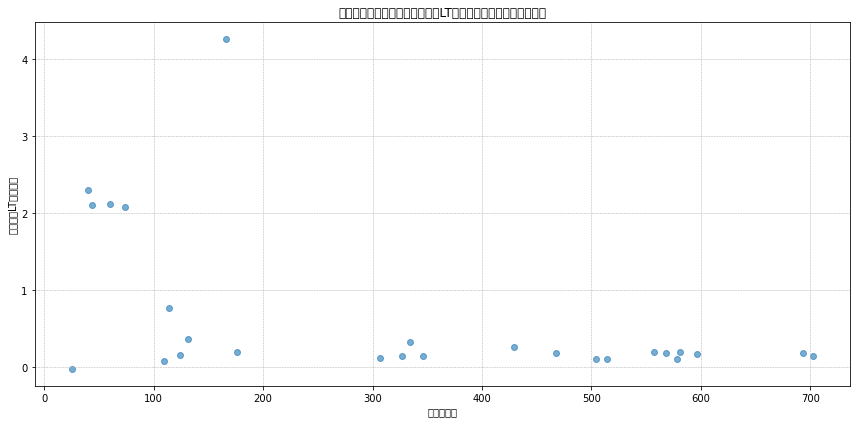

In [164]:
import matplotlib.pyplot as plt

# 各日の「検収入庫LT」と「かんばん数」の散布図を作成
plt.figure(figsize=(12, 6))
plt.scatter(grouped_daily_data['かんばんシリアル'], grouped_daily_data['検収入庫LT'], alpha=0.6)
plt.title('各日の指定時間帯の「検収入庫LT」と「かんばん数」の散布図')
plt.xlabel('かんばん数')
plt.ylabel('検収入庫LTの中央値')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()